# Laporan Uji Coba Praktikum - Logical Agents 
### Inference --> Forward and backward chaining

Name    : Abdan Hafidz
NRP     : 5054231021


## Importing Libraries

In [2]:
from utils import *
from logic import *
from notebook import psource
import agents as a
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

c:\Users\asus\anaconda3\Lib\site-packages\qpsolvers\solvers\__init__.py:711: UserWarning: no QP solver found on your system, you can install solvers from PyPI by ``pip install qpsolvers[open_source_solvers]``
  warnings.warn(


# Inference in Propositional Knowledge Base

In [3]:
(P,Q) = symbols('P,Q')

#### Truth Table Enumeration

In [4]:
psource(tt_check_all)

In this test we will prove several tautologies. First, we will test them in the form of a truth table and check suitability using Entails.

In [5]:
psource(tt_entails)

In the first example we will test whether P & Q => Q is a tautology

In [6]:
print("P    Q   P & Q   P & Q => Q")
for R in [True, False]:
    for S in [True, False]:
        print(f"{R}    {S}   {R and S}   { R if S & S else True}")

P    Q   P & Q   P & Q => Q
True    True   True   True
True    False   False   True
False    True   False   False
False    False   False   True


It can be seen that by testing the truth table we get a tautology, now we prove it using entails

In [7]:
tt_entails(P & Q, Q)

True

It is found that it is true that P & Q => Q is a tautology

We will also test P | Q is a tautology of P or Q is one of them

In [8]:
print("P            Q       P | Q   P | Q => P         P | Q => Q")
for R in [True, False]:
    for S in [True, False]:
        print(f"{R}     {R}   {R or S}      { R if R or S else True }                   { S if R or S else True }")

P            Q       P | Q   P | Q => P         P | Q => Q
True     True   True      True                   True
True     True   True      True                   False
False     False   True      False                   True
False     False   False      True                   True


It was found that P | Q has no tautology with P or Q. Likewise testing using Entails.

In [9]:
tt_entails(P | Q, P)

False

In [10]:
tt_entails(P | Q, Q)

False

# Proof By Resolution (Decomposite Of Proposition)

We can handle a verification for certains logic's law
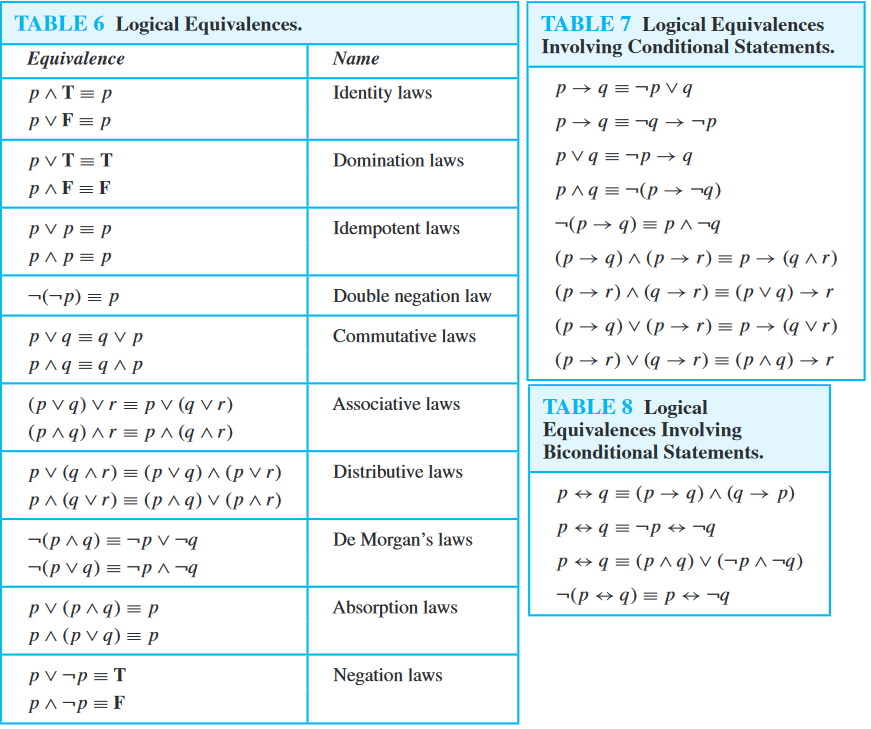

It should be remembered that an equivalence is definitely a tautology, but not necessarily vice versa. 

So we can carry out revalidation with an additional step which may be optional with a tautology test using Entails, apart from proving resolution to_cnf

As an example we will prove whether it is really equivalent for P => Q with ~P | Q

In [11]:
to_cnf(P |'==>'| Q)

(Q | ~P)

Likewise with entails testing

In [12]:
tt_entails(P |'==>'| Q, Q | ~P)

True

It is found that this is an equivalence

Testing for De Morgan's laws

In [13]:
to_cnf(~(P & Q))

(~P | ~Q)

In [14]:
to_cnf(~(P | Q))

(~P & ~Q)

Next we will test the remaining logical equivalence from Table 7 above

In [15]:
to_cnf(~Q |'==>'| ~P)

(~P | Q)

Remember that ~P | Q is equivalent to P => Q

In [16]:
to_cnf(~P |'==>' | Q)

(Q | P)

In [17]:
to_cnf(~ (P |'==>' | ~Q))

(Q & P)

In [18]:
to_cnf(~(P | '==>' | Q))

(~Q & P)

In [19]:
R = Symbol('R')
to_cnf(P | '==>' | (Q & R) )

((Q | ~P) & (R | ~P))

In [20]:
to_cnf(P | '==>' | (Q | R) )

(Q | R | ~P)

In [21]:
to_cnf( (P | Q) | '==>' | (R) )

((~P | R) & (~Q | R))

In [22]:
to_cnf( (P & Q) | '==>' | (R) )

(R | ~P | ~Q)

It can be seen that all tests in table 7 are appropriate

Now we test for a Biimplication P <=> Q

In [23]:
to_cnf( P  | '<=>' | Q )

((P | ~Q) & (Q | ~P))

# Propotitional Knowledge Base & Proof Resolution
We can add satisfying value for each value / statement that can conquered the evaluation result (True / False). 

For example we can create Ponnens & Tollens as Knowledge Base
*Modus Ponnens* <br>
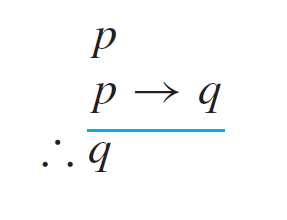
<br>
*Modus Tollens*<br>
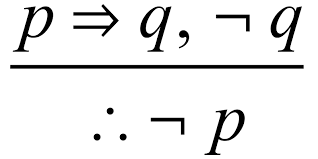


In [24]:
psource(pl_resolution)

In [25]:
kb = PropKB()

For example we can provide for P => Q , P satisfying the implication will give us the conclusion Q

In [26]:
kb.tell(P|'==>'|Q)

In [27]:
kb.tell(P)

In [28]:
kb.ask_if_true(P)
pl_resolution(kb, P)

True

Also for ~Q will give us the conclusion ~P

In [29]:
kb.retract(P)
kb.tell(~Q)

In [30]:
# kb.ask_if_true(~Q)
pl_resolution(kb, ~P)

True

# Forward and Backward Chaining

Untuk Langkah Forward and Backward Chaining kita dapat mengujinya dengan salah satu sample yaitu hukum Silogisme. 

Hukum Silogisme menyatakan bahwa untuk kedua Implikasi

P =>Q <br>
Q => R <br>
--------- <br>
:. P => R <br>

We can make clauses

In [ ]:
psource(PropDefiniteKB.clauses_with_premise)
psource(pl_fc_entails)

In [32]:
clauses = ['P ==> Q',
           'Q ==> R']

We will now tell this information to our knowledge base.

In [33]:
definite_clauses_KB = PropDefiniteKB()
for clause in clauses:
    definite_clauses_KB.tell(expr(clause))

By applying the implication, if we add P as valid, then the implication P => Q will be fulfilled and make Q true

In [34]:
clauses.append('P')
definite_clauses_KB.tell(expr('P'))

In [35]:
pl_fc_entails(definite_clauses_KB, expr('Q'))

True

The consequence of Q being true is that the implication Q => R will be fulfilled so that R is true

In [36]:
pl_fc_entails(definite_clauses_KB, expr('R'))

True

So we can simplify the result of P being true and R being true

In [37]:
tt_entails( (P |'==>'| Q) & (Q |'==>'| R), P |'==>'| R)

True